In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
import torch

# Check if GPU is available≠
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of each GPU
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")

    # Get the current GPU device
    current_device = torch.cuda.current_device()
    print(f"Current GPU device: {current_device}")

    # Get GPU properties
    gpu_properties = torch.cuda.get_device_properties(current_device)
    print(f"GPU Properties:\n{gpu_properties}")
else:
    print("No GPU available. Switching to CPU.")

Number of available GPUs: 1
GPU 0: Tesla T4
Current GPU device: 0
GPU Properties:
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [5]:
import torch
import numpy as np

# Initializing a Tensor

## Directly from data

In [6]:
data = [[1,2],[3,4]]

x_data = torch.tensor(data)
print(type(data))
print(type(x_data))
x_data.device

<class 'list'>
<class 'torch.Tensor'>


device(type='cpu')

In [7]:
data = [[1,2],[3,4]]

x_data = torch.tensor(data,device = 'cuda')
print(type(data))
print(type(x_data))
x_data.device

<class 'list'>
<class 'torch.Tensor'>


device(type='cuda', index=0)

In [8]:
torch.rand(3,3)

tensor([[0.6324, 0.6792, 0.3558],
        [0.1605, 0.1724, 0.4498],
        [0.8054, 0.9775, 0.0201]])

# Basic Tensor operation

In [9]:
device = 'cpu'

if torch.cuda.is_available():
    device = 'cuda'
device

'cuda'

In [10]:
a = torch.randn(5,7)  # creating in cpu

a = a.to(device) # transfering to gpu
print(a.device)

cuda:0


# Checking How GPU is Faster Then CPU

In [11]:
setup = 'import torch'

gpu_code = '''
a1 = torch.randn(1000,1000,device='cuda')
a2 = torch.randn(1000,1000,device='cuda')
a = a1 @ a2
'''


cpu_code = '''
b1 = torch.randn(1000,1000,device='cpu')
b2 = torch.randn(1000,1000,device='cpu')
b = b1 @ b2
'''

In [20]:
import timeit

t_gpu = timeit.timeit(setup =setup, stmt = gpu_code,number = 1000)

t_cpu = timeit.timeit(setup =setup, stmt = cpu_code,number = 1000)


print(t_gpu)
print(t_cpu)
print("CPU is slower about:",round(((t_cpu-t_gpu)*100)/t_cpu,2),"%")

0.5307453909999822
39.13006384199997
CPU is slower about: 98.64 %


# Neural Network module

In [13]:
from torch import nn
import matplotlib.pyplot as plt

In [14]:
ff = nn.Linear(10,10)
ff.state_dict()

OrderedDict([('weight',
              tensor([[-0.1544,  0.1086, -0.2854,  0.2662, -0.2682, -0.2133, -0.1439, -0.2867,
                        0.0511, -0.2257],
                      [ 0.1331,  0.0077,  0.0038, -0.0634, -0.1746,  0.0361, -0.1099, -0.2278,
                       -0.0291,  0.1093],
                      [-0.0985, -0.0598, -0.1603, -0.2533,  0.1426, -0.1841,  0.0999,  0.2878,
                       -0.0728, -0.1485],
                      [ 0.0350, -0.1133, -0.2442,  0.1255, -0.0417, -0.0108, -0.0892, -0.0974,
                        0.2330,  0.1644],
                      [-0.0525,  0.0528,  0.0156,  0.0215,  0.0003,  0.0735, -0.2245,  0.1789,
                       -0.2731,  0.0475],
                      [ 0.1187, -0.2991, -0.2679,  0.1921, -0.1908,  0.3042,  0.1290,  0.2004,
                        0.1025,  0.2710],
                      [-0.1549,  0.0511,  0.1430, -0.1481,  0.0596, -0.1766, -0.0260,  0.1261,
                       -0.0549, -0.0409],
                 

(array([[3., 2., 2., 0., 0., 1., 1., 0., 0., 1.],
        [0., 1., 1., 2., 1., 3., 1., 1., 0., 0.],
        [1., 1., 2., 3., 0., 0., 1., 1., 0., 1.],
        [0., 1., 0., 3., 2., 1., 1., 1., 1., 0.],
        [1., 1., 0., 0., 2., 4., 1., 1., 0., 0.],
        [2., 1., 0., 0., 0., 0., 2., 1., 2., 2.],
        [0., 0., 3., 0., 3., 2., 1., 1., 0., 0.],
        [4., 0., 0., 1., 0., 1., 2., 0., 0., 2.],
        [0., 2., 0., 1., 3., 1., 1., 0., 0., 2.],
        [0., 0., 0., 1., 3., 2., 0., 2., 1., 1.]]),
 array([-0.30875802, -0.24629658, -0.18383513, -0.1213737 , -0.05891225,
         0.00354919,  0.06601063,  0.12847207,  0.19093351,  0.25339496,
         0.3158564 ]),
 <a list of 10 BarContainer objects>)

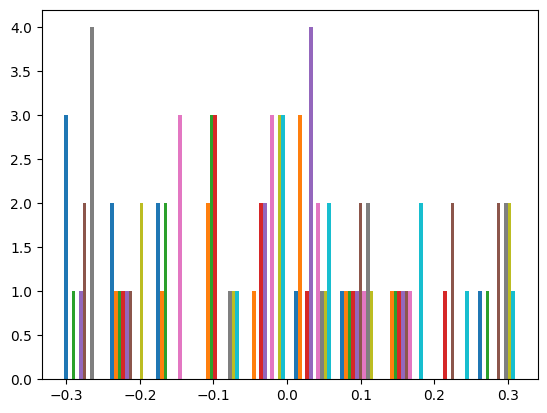

In [15]:
plt.hist(ff.state_dict()["weight"])

(array([11.,  9.,  8., 11., 14., 15., 11.,  8.,  4.,  9.]),
 array([-0.30875802, -0.24629658, -0.18383513, -0.1213737 , -0.05891225,
         0.00354919,  0.06601063,  0.12847207,  0.19093351,  0.25339496,
         0.3158564 ]),
 <BarContainer object of 10 artists>)

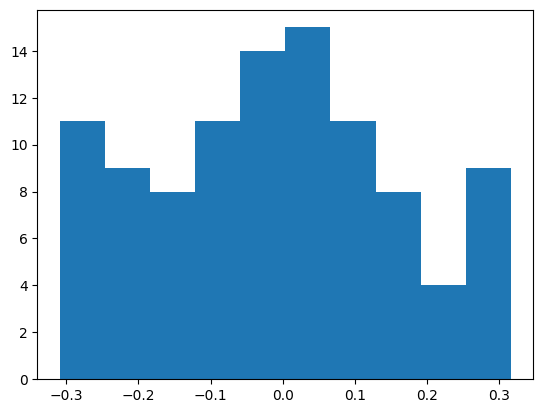

In [16]:
plt.hist(ff.state_dict()["weight"].reshape(-1))

In [17]:
ff.weight.data.normal_(mean=0,std=0.5)  #normalization

tensor([[-0.0160, -0.8576,  0.1354, -0.3999,  0.1871, -0.2274,  0.3788,  0.2959,
         -0.9312,  0.0295],
        [-1.1808, -0.1420,  1.0581, -0.0556, -0.0183,  0.5514, -0.4751, -0.1761,
         -0.8133,  0.5917],
        [-0.3624,  0.3262,  0.1862,  0.2783,  0.3677, -0.6486, -0.1498, -0.5089,
          0.1184,  0.3181],
        [-0.8806, -0.2880, -0.3830, -0.0110, -0.1126,  0.1601,  0.1370,  0.6116,
          0.2295, -0.0380],
        [-0.3379,  0.0991,  0.1764, -0.1956,  0.3379,  0.3732, -0.2100,  0.2297,
          0.7103, -0.6981],
        [ 0.6290,  0.1995,  0.9339,  0.7036,  0.7464,  0.1934, -0.8716, -0.2860,
          0.1280, -0.2357],
        [-0.0133, -0.3214, -0.1115,  0.0349, -0.1405, -0.6433,  0.6538,  0.2872,
          0.6103,  0.4308],
        [ 1.3308, -0.8684, -0.7322,  0.6633, -0.1517, -0.5260, -1.0164, -0.4655,
         -0.1955, -0.1444],
        [-0.2082, -0.2903,  0.6477, -0.2997,  0.4156, -0.3245,  0.5821, -0.4897,
          0.5615,  1.0373],
        [ 0.7592,  

(array([ 3.,  8.,  8., 18., 17., 20., 10., 12.,  3.,  1.]),
 array([-1.18077052, -0.92961323, -0.67845601, -0.42729872, -0.17614147,
         0.07501578,  0.32617304,  0.57733029,  0.82848758,  1.0796448 ,
         1.33080208]),
 <BarContainer object of 10 artists>)

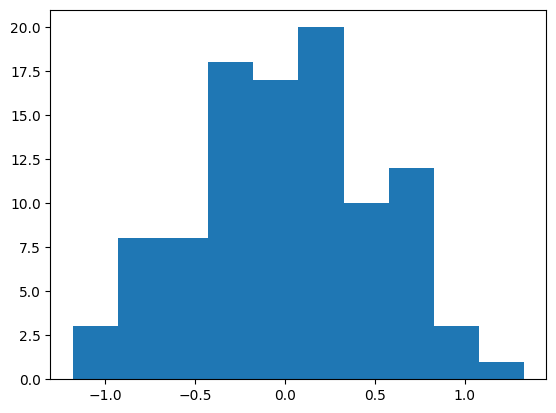

In [18]:
plt.hist(ff.state_dict()["weight"].reshape(-1))

#Working With Data

Dataset - *Sotrage* and internal details <br>
DataLoader *italicised text* - Internal data modiication

In [2]:
#!pip install torchvision --upgrade
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
training_data = datasets.FashionMNIST(root='fashiondata',train=True,download=True,transform = ToTensor())

In [8]:
testing_data = datasets.FashionMNIST(root='fashiondata',train=False,download=True,transform = ToTensor())

In [10]:
bat_size = 32
train_dataloader = DataLoader(training_data,batch_size=bat_size)
test_dataloader = DataLoader(testing_data, batch_size=bat_size)

In [12]:
for X,y in train_dataloader:
  print(X.shape)
  print(y.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


#Creating Model

In [13]:
class NeuralNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.lin_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)

    )

  def forward(self,x):
    x = self.Flatten(x)
    outs = self.lin_stack(x)
    return outs

In [14]:
model = NeuralNetwork()


In [15]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lin_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [16]:
for k in model.state_dict():
  print(k)

lin_stack.0.weight
lin_stack.0.bias
lin_stack.2.weight
lin_stack.2.bias
lin_stack.4.weight
lin_stack.4.bias


In [18]:
for k in model.state_dict()['lin_stack.4.bias']:
  print(k)

tensor(0.0220)
tensor(0.0170)
tensor(0.0185)
tensor(0.0341)
tensor(-0.0101)
tensor(-0.0225)
tensor(-0.0312)
tensor(-0.0252)
tensor(-0.0401)
tensor(-0.0041)


In [20]:
wt = model.state_dict()['lin_stack.4.bias']

In [21]:
wt.shape

torch.Size([10])

(array([1., 1., 2., 0., 2., 0., 0., 2., 1., 1.]),
 array([-0.04014657, -0.03271911, -0.02529165, -0.01786419, -0.01043672,
        -0.00300926,  0.0044182 ,  0.01184566,  0.01927313,  0.02670059,
         0.03412805]),
 <BarContainer object of 10 artists>)

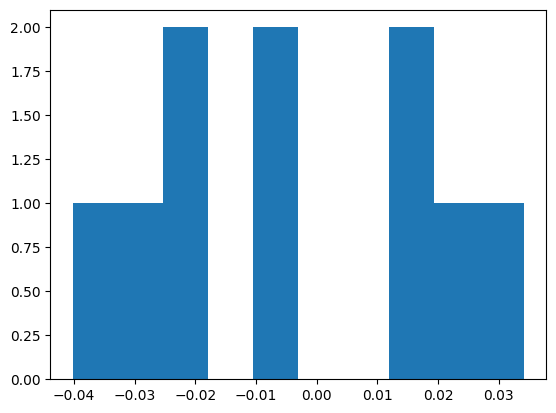

In [22]:
import matplotlib.pyplot as plt
plt.hist(wt)

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [25]:
device

'cuda'

In [26]:
model = model.to(device)

In [27]:
model.state_dict()['lin_stack.4.bias']

tensor([ 0.0220,  0.0170,  0.0185,  0.0341, -0.0101, -0.0225, -0.0312, -0.0252,
        -0.0401, -0.0041], device='cuda:0')

# Optiizing the model parameters

In [29]:
model.parameters()

<generator object Module.parameters at 0x7f71d5d1a500>

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [43]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)


    #forward propagation - compute the prediction
    y_hat = model(X)
    loss = loss_fn(y_hat,y)

    #optimization
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch%100 == 0:
      loss, current = loss.item(), (batch+1)+len(X)
      print(f"loss: {loss:>5f} [{current:=5d}/{size:>5d}]")


In [37]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.datasets)
  num_batches = len(dataloader)
  model.eval()

  test_loss, correct = 0,0

  with torch.no_grad():
    for X,y in dataloader:
      X,y = X.to(device),y.to(device)
      y_hat = model(X)
      test_loss = test_loss + loss_fn(y_hat,y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /+ size
  print(f"Test Error: \n Acuracy: {(100*correct):>0.1f}%, avg loss: {test_loss:>8f}\n")


In [44]:
epochs = 1
for t in range(epochs):
  print(f"Epoch {t+1}\m --------------------------")
  train(train_dataloader,model,loss_fn,optimizer)
  test(test_dataloader,model,loss_fn)

print("Training Done")

Epoch 1\m --------------------------


AttributeError: 'NeuralNetwork' object has no attribute 'Flatten'